In [ ]:
# Kiểm tra đã cấu hình GPU hay không
!nvidia-smi

In [ ]:
# Liên kết với google driver
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [ ]:
# Clone thư viện darknet từ github
!git clone https://github.com/AlexeyAB/darknet

In [ ]:
#cấu hình các thư viện như OPENCV, GPU, CUDNN trên mạng máy ảo. 
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
#!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!make

In [ ]:
# Sao chép cấu trúc mạng đã cấu hình từ google driver
!cp /mydrive/training_tiny/yolov4-tiny_3l.cfg ./cfg

In [ ]:
# Xen lại tệp tin kiến trúc mạng đã khởi tạo
!cat '/content/darknet/cfg/yolov4-tiny_3l.cfg'

In [ ]:
#Tạo file obj.names và obj.data gồm tên các đối tượng nhận dạng và số phân lớp của chúng.
!echo -e 'hard_hat \ngloves \nsafe_vest \nno_hat \nno_gloves \nno_vest' > data/obj.names
!echo -e 'classes= 6\ntrain  = data/train.txt\nvalid  = data/test.txt\nnames = data/obj.names\nbackup = /mydrive/training_tiny' > data/obj.data
!mkdir data/obj

In [1]:
# Xem lại file đã khởi tạo
!cat data/obj.data

cat: data/obj.data: No such file or directory


In [ ]:
#download file pre-traininig về máy
%cd /content/darknet
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.conv.29

In [ ]:
#Mã hoá tất cả các dữ liệu huấn luyện vào thư mục obj
!unzip /mydrive/training_tiny/database_tiny.zip -d data/obj

In [ ]:
# Tạo tập dữ liệu huấn luyện và đánh giá sau khi đã mã hoá
!cp /mydrive/training_tiny/generate_train.py ./
!cp /mydrive/training_tiny/generate_test.py ./

In [ ]:
# crete folder tests
!mkdir "data/test"

In [ ]:
# run file generate train and test
!python generate_train.py
!python generate_test.py

In [ ]:
# Huấn luyện mạng với bộ pre-training
!./darknet detector train data/obj.data cfg/yolov4-tiny_3l.cfg yolov4-tiny.conv.29 -dont_show -map

In [ ]:
#Darknet sẽ tự động xuất ra các file trọng số, sử dụng hàm backup để kiểm tra các file trọng số trong thư mục
!ls backup

In [ ]:
#Việc huấn luyện trên google colab là không ổn định, do đó darknet có hỗ trợ huấn luyện từ file trọng số cuối cùng
!./darknet detector train data/obj.data cfg/yolov4-tiny.cfg /mydrive/training_yolov4_tiny/yolov4-tiny_3l_last.weights -dont_show -map

TIP: This training could take several hours depending on how many iterations you chose in the .cfg file. You will want to let this run as you sleep or go to work for the day, etc. However, Colab Cloud Service kicks you off it's VMs if you are idle for too long (30-90 mins).

To avoid this hold (CTRL + SHIFT + i) at the same time to open up the inspector view on your browser.

Paste the following code into your console window and hit Enter

function ClickConnect(){ console.log("Working"); document.querySelector("colab-toolbar-button#connect").click() } 
setInterval(ClickConnect,60000)

In [ ]:
# Vì google colab không hỗ trợ hàm cv2.imshow() nên ta phải định nghĩa lại hàm này
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

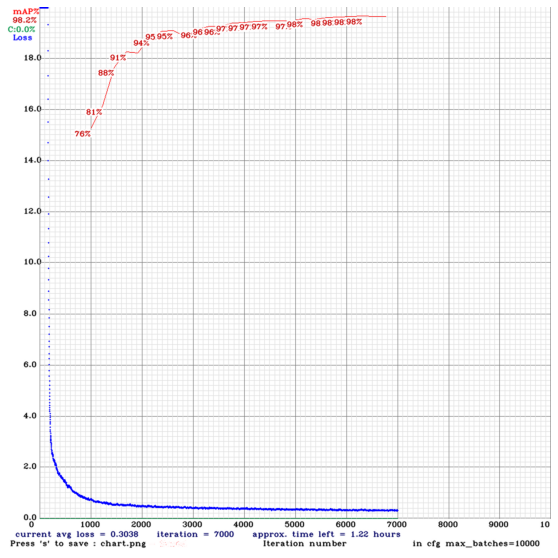

In [ ]:
imShow("chart_yolov4-tiny-3l.png")


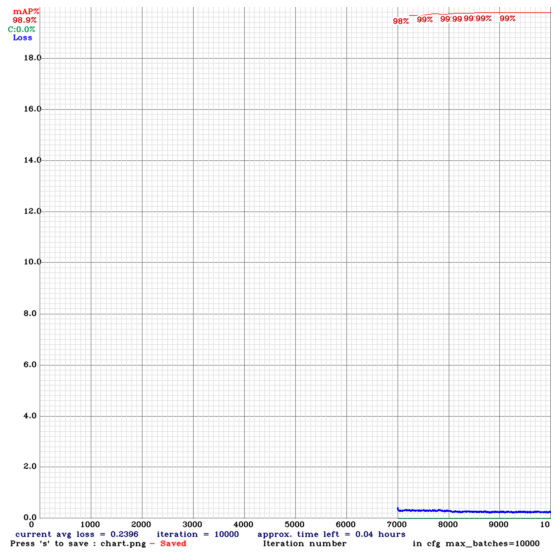

In [ ]:
imShow("chart_yolov4-tiny-3l.png")

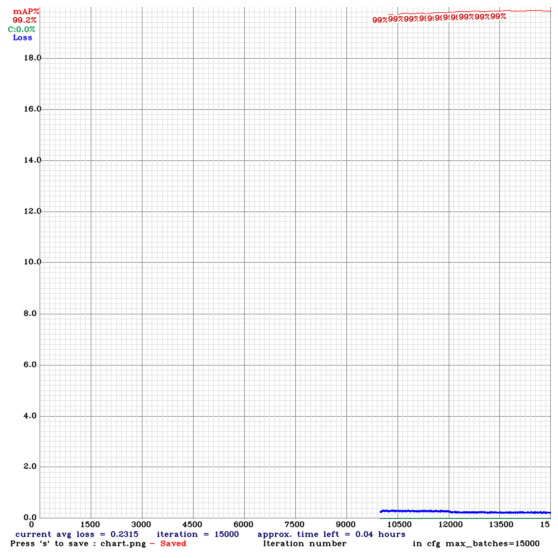

In [ ]:
imShow("chart_yolov4-tiny-3l.png")

Cấu hình lại giá trị trọng nhằm test trực tiếp trên ảnh


In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-tiny_3l.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-tiny_3l.cfg
!sed -i 's/width=416/width=608/' yolov4-tiny_3l.cfg
!sed -i 's/height=416/height=608/' yolov4-tiny_3l.cfg
%cd ..

Detect Ảnh

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg /mydrive/thesis_safewear_YOLOv4//yolov4-tiny_3l_last.weights /mydrive/thesis_safewear_YOLOv4/safetyvest398.jpg -thresh 0.3
imShow('predictions.jpg')